# Reinforcement Learning

In [9]:
import chess
import numpy as np
from IPython.display import clear_output
from chessbot.chessbot import ChessBot

def play_game_and_learn(model, exploration_rate=0.0, should_visualise=False):
	white = ChessBot(model, chess.WHITE, exploration_rate)
	black = ChessBot(model, chess.BLACK, exploration_rate)

	board = chess.Board()

	if should_visualise:
		display(board)

	while not board.is_game_over(claim_draw=True):
		board.push(black.move(board) if board.turn == chess.BLACK else white.move(board))

		if should_visualise:
			clear_output(wait=True)
			display(board)

	result = board.outcome(claim_draw=True).result()
	if result == '1-0':
		model.partial_fit(black.moves_made, np.ones(len(black.moves_made)))
		model.partial_fit(white.moves_made, np.ones(len(white.moves_made)))
	elif result == '0-1':
		model.partial_fit(black.moves_made, np.zeros(len(black.moves_made)))
		model.partial_fit(white.moves_made, np.zeros(len(white.moves_made)))
	else:
		model.partial_fit(black.moves_made, np.full(len(black.moves_made), 0.75))
		model.partial_fit(white.moves_made, np.full(len(white.moves_made), 0.25))

	return result

## Setting the exploration rate
The exploration rate is defined as the chance of randomly making a move instead of relying on the prediction of the model.

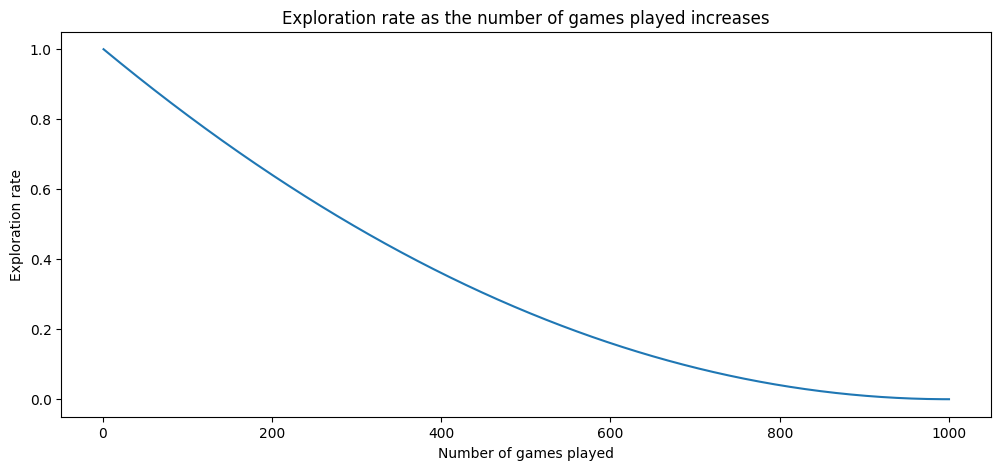

In [4]:
import matplotlib.pyplot as plt

num_games = 1000
exploration_rates = np.linspace(1, 0, num_games)**2

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_xlabel('Number of games played')
ax.set_ylabel('Exploration rate')
ax.plot(np.linspace(1, 1000, num_games), exploration_rates)
ax.set_title('Exploration rate as the number of games played increases')

plt.show()

## Training the model
The model will be trained by playing against itself.

In [10]:
from sklearn.neural_network import MLPRegressor
from IPython.display import clear_output

model = MLPRegressor(warm_start=True)

results = []
white_wins = 0
black_wins = 0
draws = 0

for i in range(num_games):
	clear_output(wait=True)
	if i > 0:
		print(f"The last game's result: {results[-1]}")
	print(f'White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}')
	print(f'Game {i + 1}/{num_games} (exploration rate: {exploration_rates[i]:.2f})')

	result = play_game_and_learn(model, exploration_rate=exploration_rates[i])
	results.append(result)

	match result:
		case '1-0':
			white_wins += 1
		case '0-1':
			black_wins += 1
		case '1/2-1/2':
			draws += 1 

The last game's result: 1/2-1/2
White wins: 0, Black wins: 0, Draws: 1
Game 2/1000 (exploration rate: 1.00)


In [ ]:
print(f'White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}')

## Why not watch a game after all that training?

In [ ]:
result = play_game_and_learn(model, should_visualise=True)
print(f'Game result: {result}')